In [ ]:
# 1. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Load the dataset
df = pd.read_csv('Orders_merged.csv', parse_dates=['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'review_creation_date', 'review_answer_timestamp'])

# 3. Data overview
print(df.shape)
print(df.info())
display(df.head())

# 4. Data cleaning (drop duplicates, handle missing values)
df = df.drop_duplicates()
missing = df.isnull().sum()
print("Missing values:\n", missing)

# Fill or drop missing values as appropriate
# Example: fillna for review_score, drop rows with missing order_id
df['review_score'] = df['review_score'].fillna(df['review_score'].median())
df = df.dropna(subset=['order_id'])

# 5. Key metrics
# GMV (Gross Merchandise Value)
gmv = df['payment_value'].sum()
print(f"GMV: {gmv:,.2f}")

# Order count
order_count = df['order_id'].nunique()
print(f"Order count: {order_count}")

# Customer count
customer_count = df['customer_id'].nunique()
print(f"Customer count: {customer_count}")

# Seller count
seller_count = df['seller_id'].nunique()
print(f"Seller count: {seller_count}")

# Average order value
aov = gmv / order_count
print(f"Average Order Value: {aov:.2f}")

# Average customer spend
acs = gmv / customer_count
print(f"Average Customer Spend: {acs:.2f}")

# 6. Time-based analysis
df['order_month'] = df['order_purchase_timestamp'].dt.to_period('M')
monthly_gmv = df.groupby('order_month')['payment_value'].sum()
monthly_orders = df.groupby('order_month')['order_id'].nunique()

plt.figure(figsize=(12,5))
monthly_gmv.plot(marker='o')
plt.title('Monthly GMV')
plt.ylabel('GMV')
plt.xlabel('Month')
plt.show()

plt.figure(figsize=(12,5))
monthly_orders.plot(marker='o', color='orange')
plt.title('Monthly Order Count')
plt.ylabel('Orders')
plt.xlabel('Month')
plt.show()

# 7. Customer and seller distribution by state
customer_state = df['customer_state'].value_counts()
seller_state = df['seller_state'].value_counts()

plt.figure(figsize=(10,4))
customer_state.plot(kind='bar')
plt.title('Customer Distribution by State')
plt.ylabel('Number of Customers')
plt.show()

plt.figure(figsize=(10,4))
seller_state.plot(kind='bar', color='green')
plt.title('Seller Distribution by State')
plt.ylabel('Number of Sellers')
plt.show()

# 8. Product category analysis
category_gmv = df.groupby('product_category_name')['payment_value'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12,5))
category_gmv.plot(kind='bar')
plt.title('Top 10 Product Categories by GMV')
plt.ylabel('GMV')
plt.show()

# 9. Review score analysis
review_score_dist = df['review_score'].value_counts().sort_index()
plt.figure(figsize=(8,4))
review_score_dist.plot(kind='bar')
plt.title('Review Score Distribution')
plt.xlabel('Review Score')
plt.ylabel('Count')
plt.show()

# 10. Delivery analysis
df['delivery_days'] = (df['order_delivered_customer_date'] - df['order_purchase_timestamp']).dt.days
plt.figure(figsize=(10,4))
sns.histplot(df['delivery_days'].dropna(), bins=30, kde=True)
plt.title('Delivery Days Distribution')
plt.xlabel('Days')
plt.show()

# 11. Payment type analysis
payment_type_dist = df['payment_type'].value_counts()
plt.figure(figsize=(8,4))
payment_type_dist.plot(kind='pie', autopct='%1.1f%%')
plt.title('Payment Type Distribution')
plt.ylabel('')
plt.show()

(96478, 38)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96478 entries, 0 to 96477
Data columns (total 38 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   product_id                     96478 non-null  object        
 1   seller_id                      96478 non-null  object        
 2   order_id                       96478 non-null  object        
 3   customer_id                    96478 non-null  object        
 4   order_status                   96478 non-null  object        
 5   order_purchase_timestamp       96478 non-null  datetime64[ns]
 6   order_approved_at              96464 non-null  datetime64[ns]
 7   order_delivered_carrier_date   96476 non-null  datetime64[ns]
 8   order_delivered_customer_date  96470 non-null  datetime64[ns]
 9   order_estimated_delivery_date  96478 non-null  datetime64[ns]
 10  customer_unique_id             96478 non-null  object        
 11  cus

,product_id,seller_id,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,...,seller_city,seller_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00066f42aeeb9f3007548bb9d3f33c38,5670f4db5b62c43d542e1b2d56b0cf7c,f30149f4a8882a08895b6a242aa0d612,86c180c33f454b35e1596a99da3dddc4,delivered,2018-05-20 18:45:00,2018-05-20 18:58:59,2018-05-21 16:09:00,2018-06-06 22:11:00,2018-06-20,...,sao paulo,SP,perfumaria,53.0,596.0,6.0,300.0,20.0,16.0,16.0
1,00088930e925c41fd95ebfe695fd2655,7142540dd4c91e2237acb7e911c4eba2,f5eda0ded77c1293b04c953138c8331d,68f2b37558e27791155db34bcded5ac0,delivered,2017-12-12 19:20:00,2017-12-12 19:32:19,2017-12-20 20:12:42,2017-12-23 17:11:00,2018-01-05,...,penapolis,SP,automotivo,56.0,752.0,4.0,1225.0,55.0,10.0,26.0
2,0009406fd7479715e4bef61dd91f2462,4a3ca9315b744ce9f8e9374361493884,0bf736fd0fd5169d60de3699fcbcf986,6cd217b674e22cf568f6a2cf6060fd07,delivered,2017-12-21 16:21:00,2017-12-22 17:31:27,2018-01-02 22:27:47,2018-01-06 15:03:00,2018-01-16,...,ibitinga,SP,cama_mesa_banho,50.0,266.0,2.0,300.0,45.0,15.0,35.0
3,000b8f95fcb9e0096488278317764d19,40ec8ab6cdafbcc4f544da38c67da39a,6f0dfb5b5398b271cc6bbd9ee263530e,8517e7c86998bf39a540087da6f115d9,delivered,2018-08-01 22:00:00,2018-08-01 22:15:19,2018-08-02 14:20:00,2018-08-07 17:38:00,2018-08-24,...,francisco beltrao,PR,utilidades_domesticas,25.0,364.0,3.0,550.0,19.0,24.0,12.0
4,000b8f95fcb9e0096488278317764d19,40ec8ab6cdafbcc4f544da38c67da39a,3aba44d8e554ab4bb8c09f6f78032ca8,82b838f513e00463174cc7cae7e76c1f,delivered,2018-08-10 13:24:00,2018-08-10 13:35:21,2018-08-13 14:43:00,2018-08-17 21:33:00,2018-08-27,...,francisco beltrao,PR,utilidades_domesticas,25.0,364.0,3.0,550.0,19.0,24.0,12.0


Missing values:
 product_id                           0
seller_id                            0
order_id                             0
customer_id                          0
order_status                         0
order_purchase_timestamp             0
order_approved_at                   14
order_delivered_carrier_date         2
order_delivered_customer_date        8
order_estimated_delivery_date        0
customer_unique_id                   0
customer_zip_code_prefix             0
customer_city                        0
customer_state                       0
review_id                            0
review_score                         0
review_comment_title             85171
review_comment_message           56926
review_creation_date                 0
review_answer_timestamp              0
payment_sequential                   1
payment_type                         1
payment_installments                 1
payment_value                        1
order_item_id                        0
price   

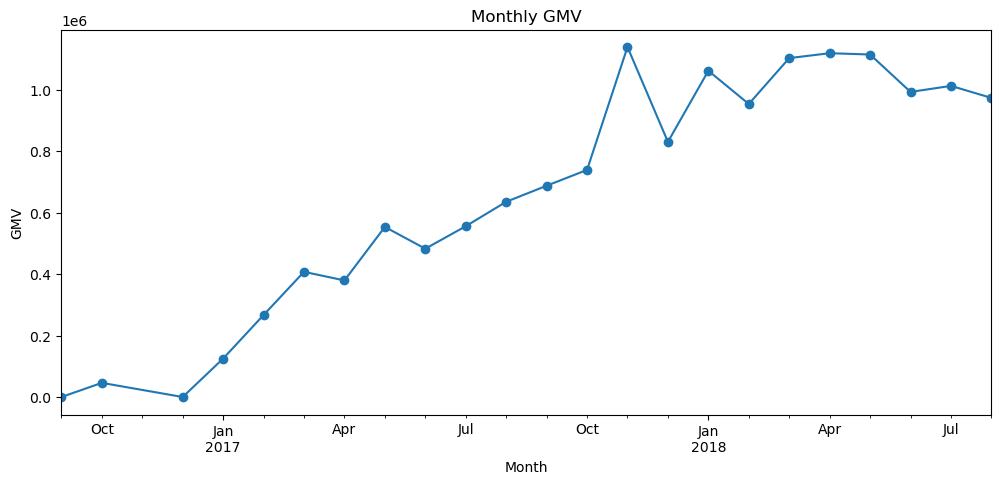

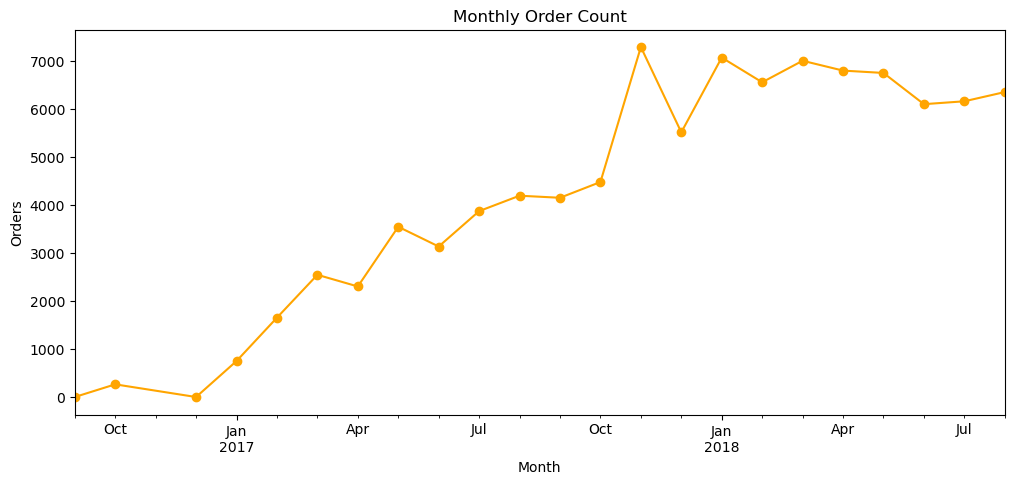

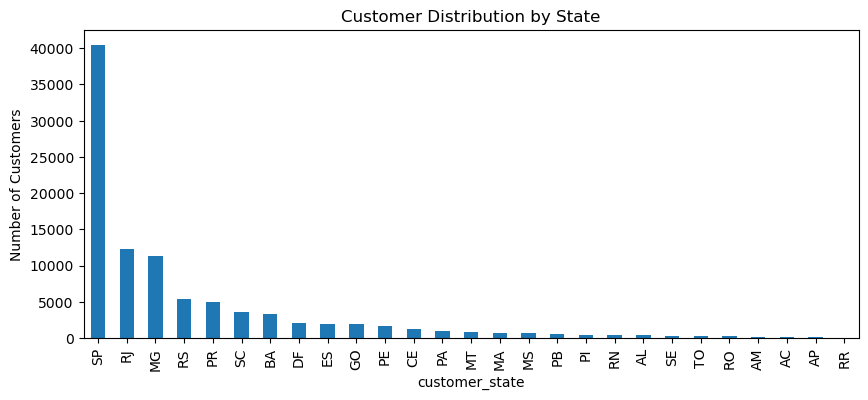

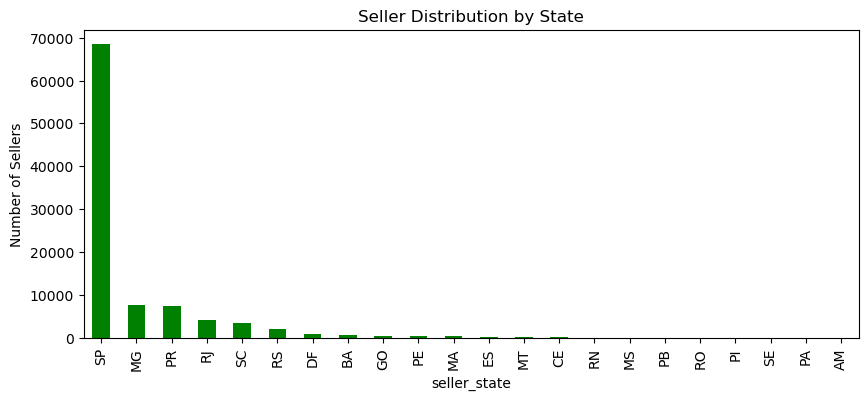

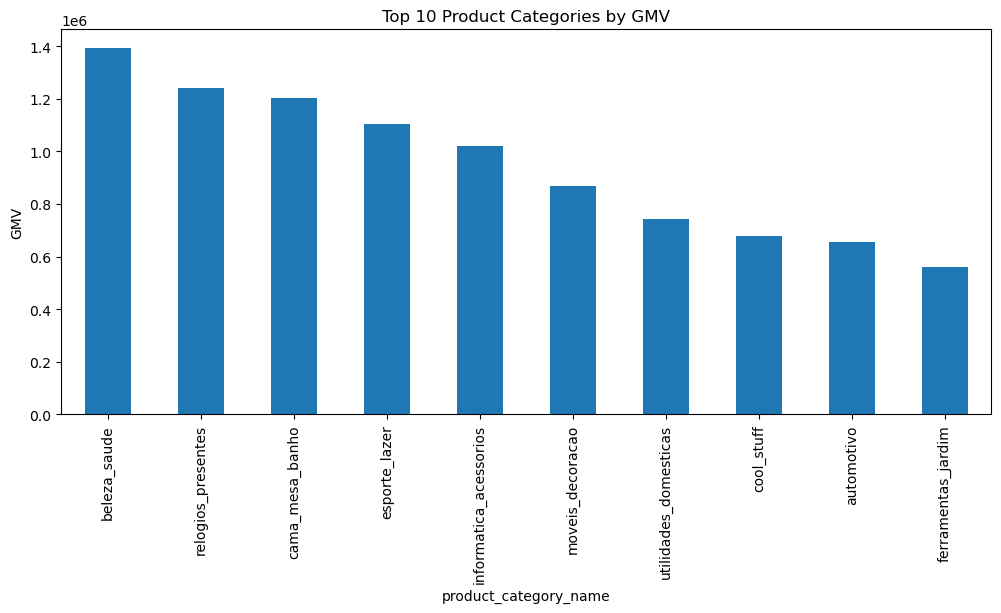

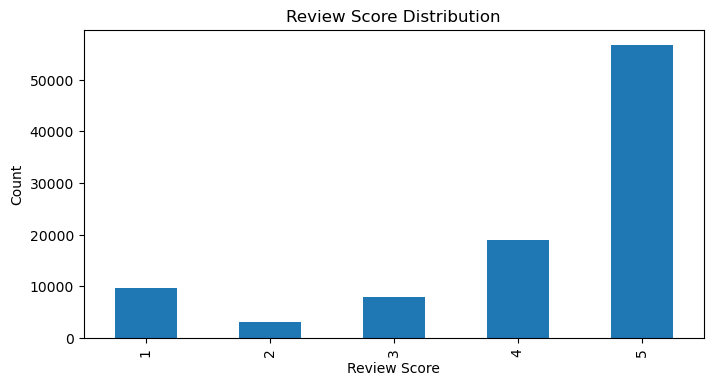

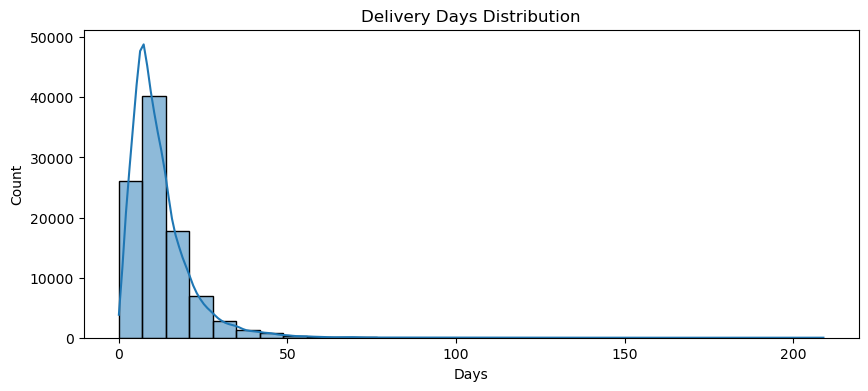

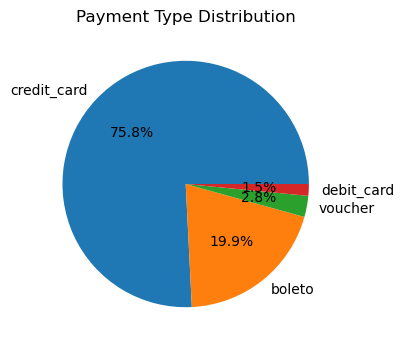

=== 数据加载与预处理 ===
原始数据集形状: (96478, 38)
清洗后数据集形状: (96474, 38)

=== 数据概览 ===
GMV(总交易额): 15,170,437.55 元
订单总数: 96,474 笔
客户总数: 96,474 人
商家总数: 2,959 家
平均订单价值(AOV): 157.25 元
客户平均消费(ACS): 157.25 元


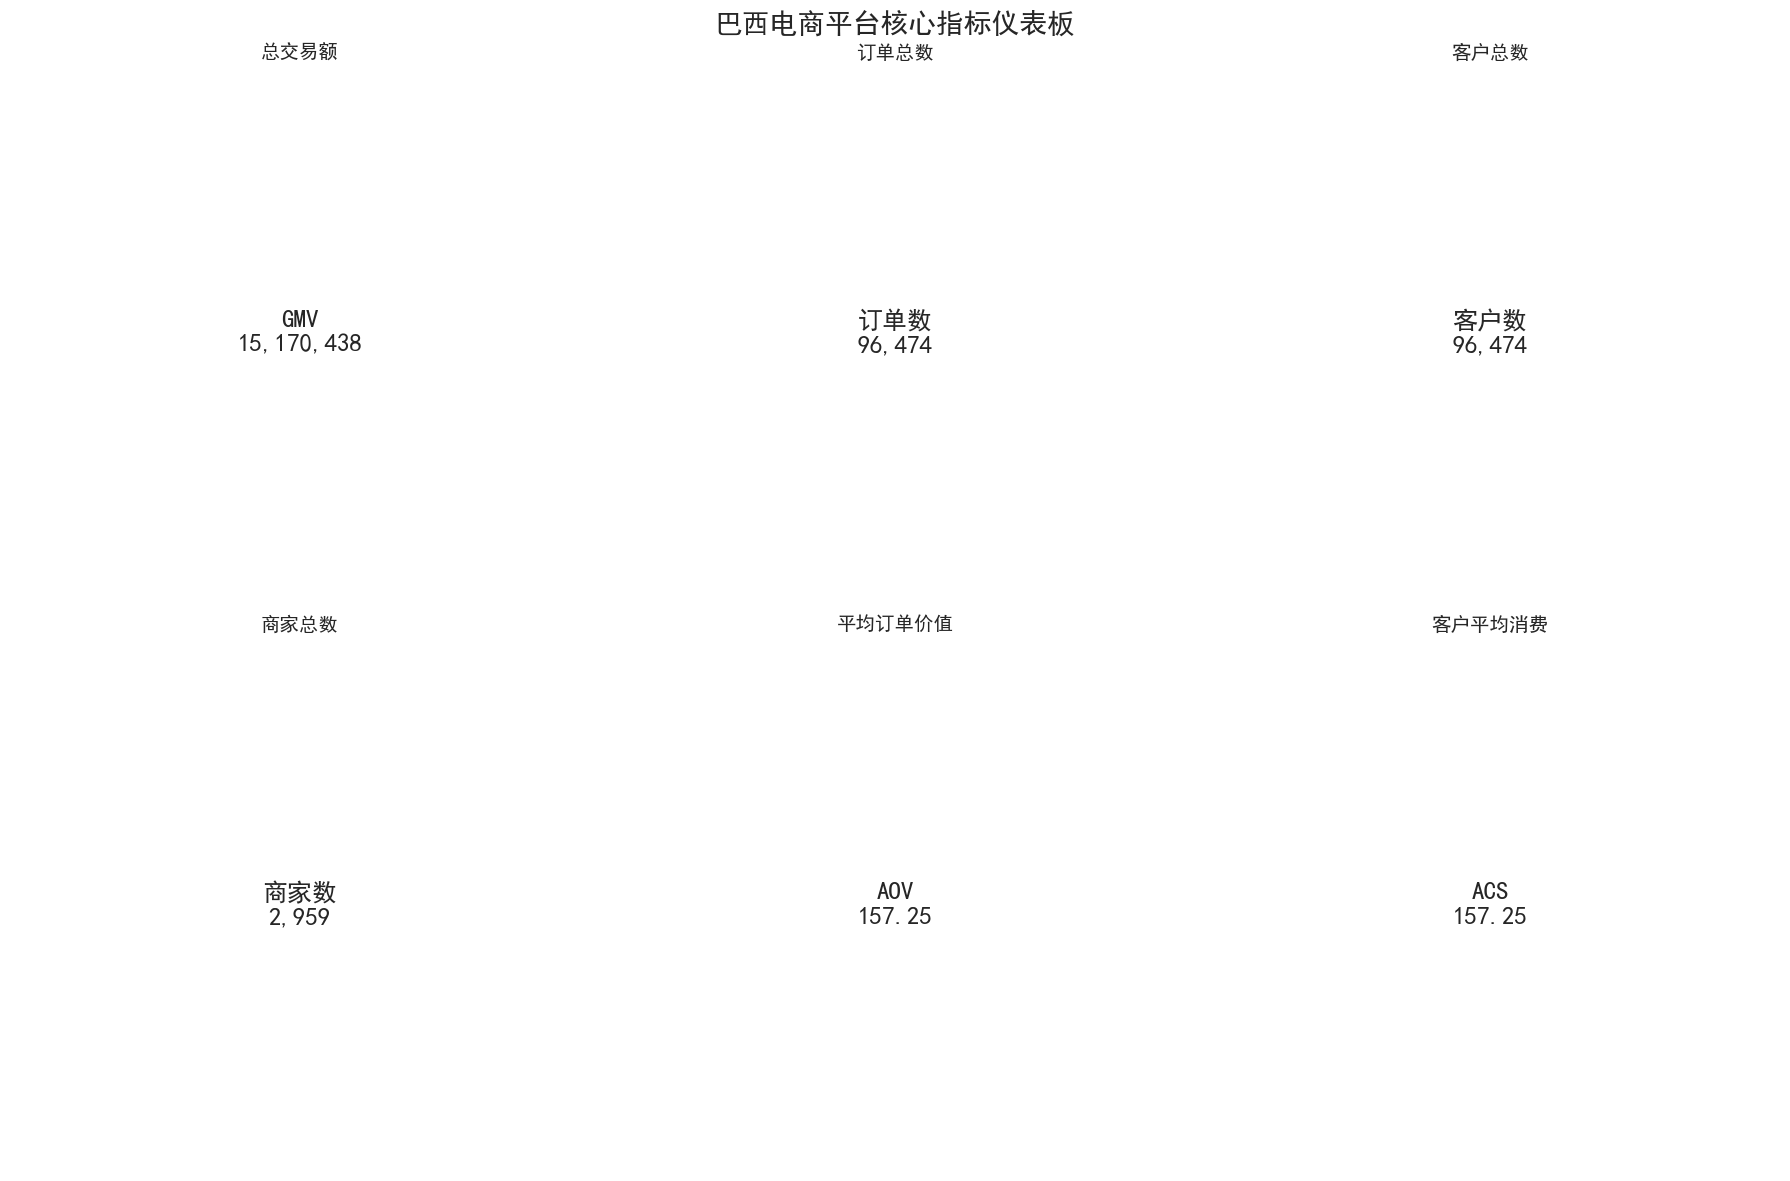


=== 4.1 时间维度分析 ===

【年度交易情况】
            payment_value  order_id
order_year                         
2016             46056.03       266
2017           6798411.07     43426
2018           8325970.45     52782


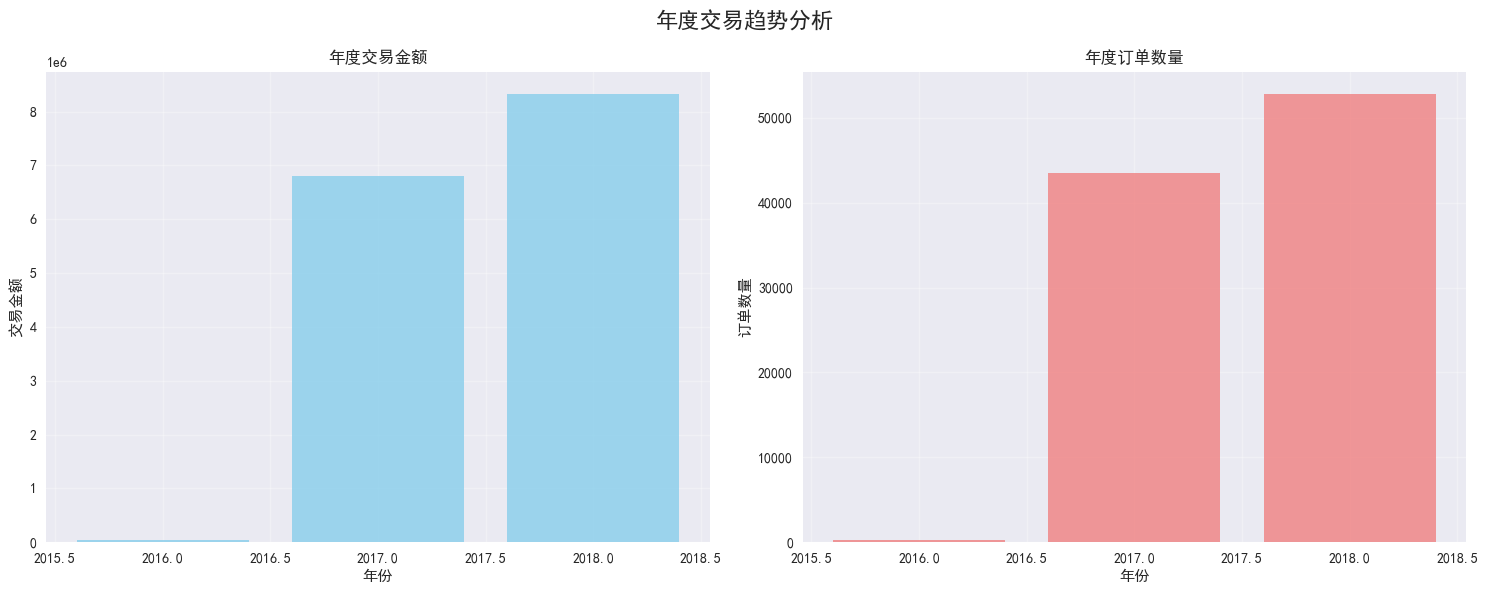


【月度交易情况】
             payment_value  order_id
order_month                         
2016-10           46036.41       265
2016-12              19.62         1
2017-01          124990.48       750
2017-02          266784.58      1653
2017-03          407192.51      2546
2017-04          379173.40      2303
2017-05          553261.71      3546
2017-06          482345.64      3134
2017-07          555547.48      3872
2017-08          634980.14      4193
2017-09          687213.11      4150
2017-10          738645.76      4477
2017-11         1138352.92      7289
2017-12          829923.34      5513
2018-01         1061187.85      7068
2018-02          953067.02      6555
2018-03         1102335.16      7003
2018-04         1118260.27      6798
2018-05         1114020.93      6749
2018-06          992308.04      6099
2018-07         1011963.50      6159
2018-08          972827.68      6351


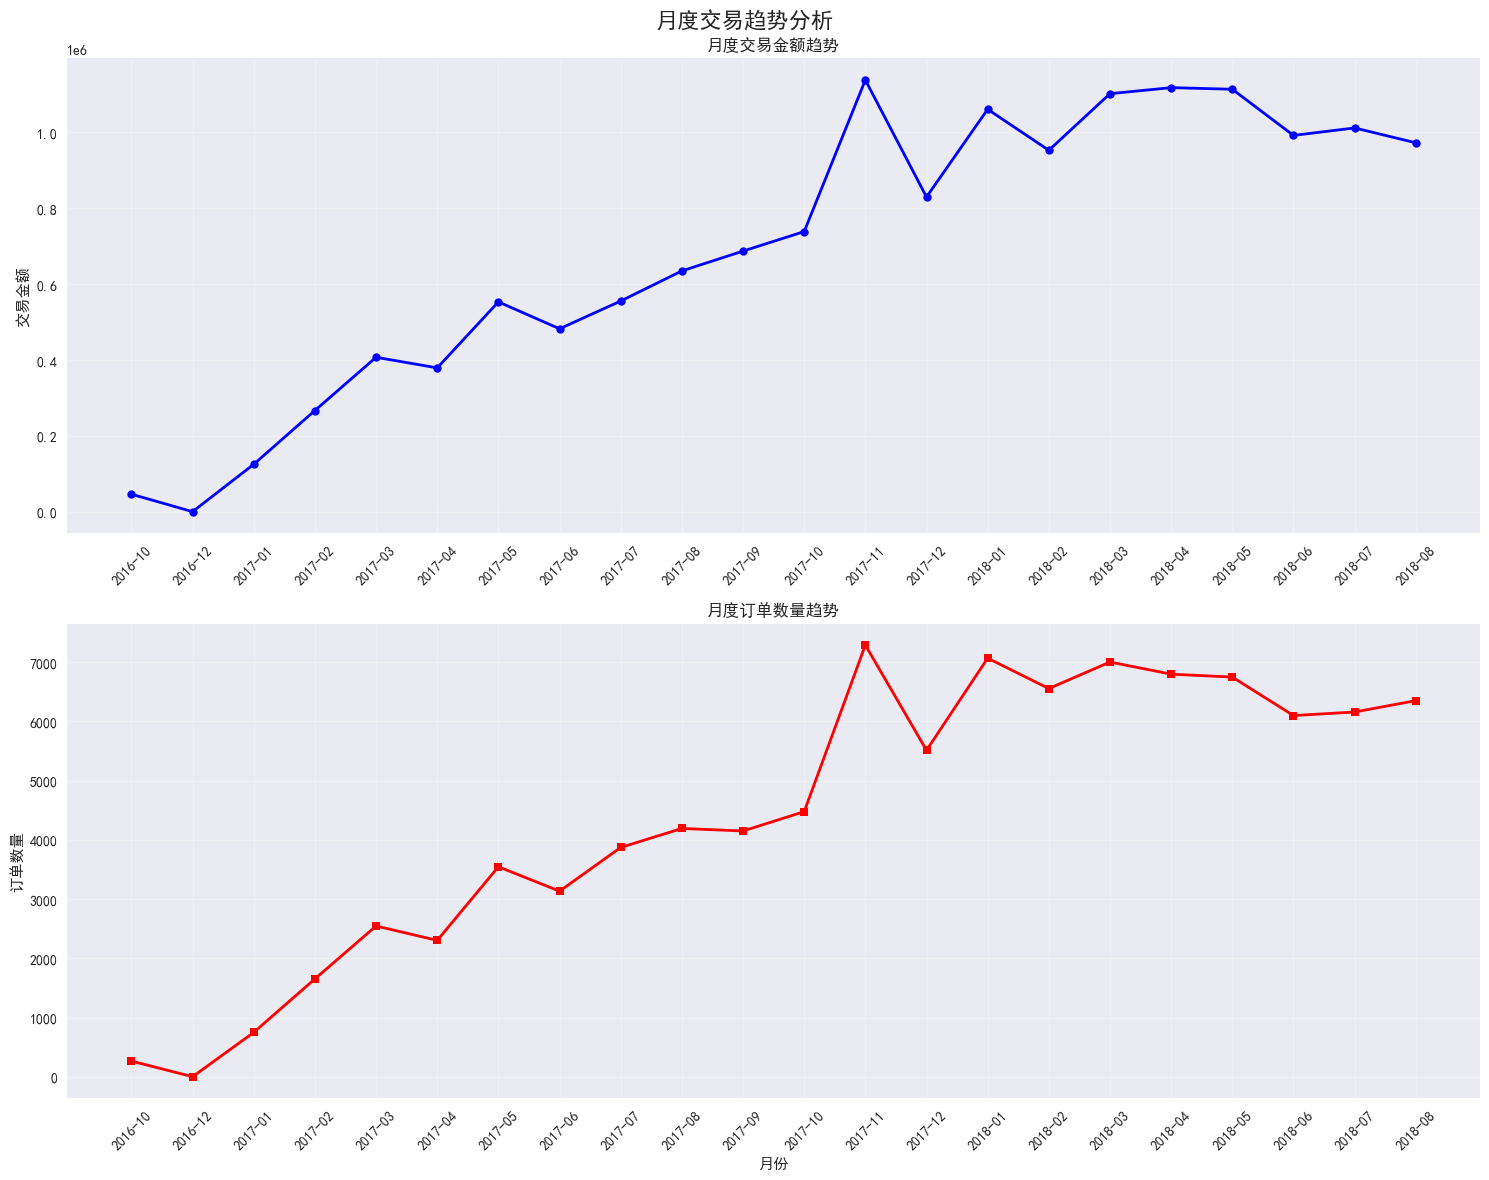


【工作日交易情况】
           payment_value  order_id
weekday                           
Monday        2497780.91     15701
Tuesday       2432946.15     15503
Wednesday     2349771.19     15075
Thursday      2245688.85     14320
Friday        2187321.22     13685
Saturday      1678362.33     10555
Sunday        1778566.90     11635


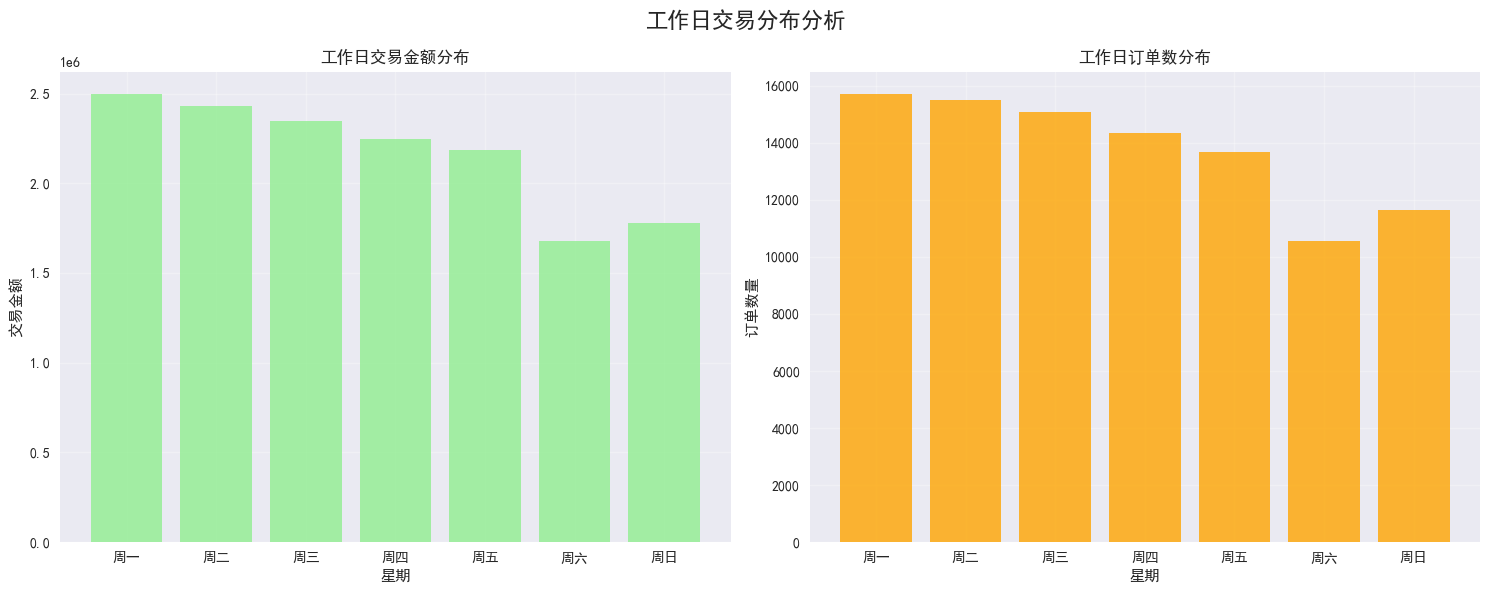


【时段交易情况】
            payment_value  order_id
order_hour                         
0               354959.21      2321
1               168586.42      1133
2                63457.96       496
3                37310.49       259
4                27693.09       203
5                25149.63       182
6                63077.55       478
7               170188.86      1199
8               445624.48      2907
9               760126.80      4647
10              938879.69      5978
11              975732.85      6385
12              935398.83      5802
13              975990.92      6309
14             1061480.85      6383
15             1011486.18      6249
16             1040087.15      6476
17              936162.89      5963
18              912362.19      5585
19              915990.28      5801
20              948917.86      6007
21              931397.49      6039
22              878607.87      5659
23              591768.01      4013


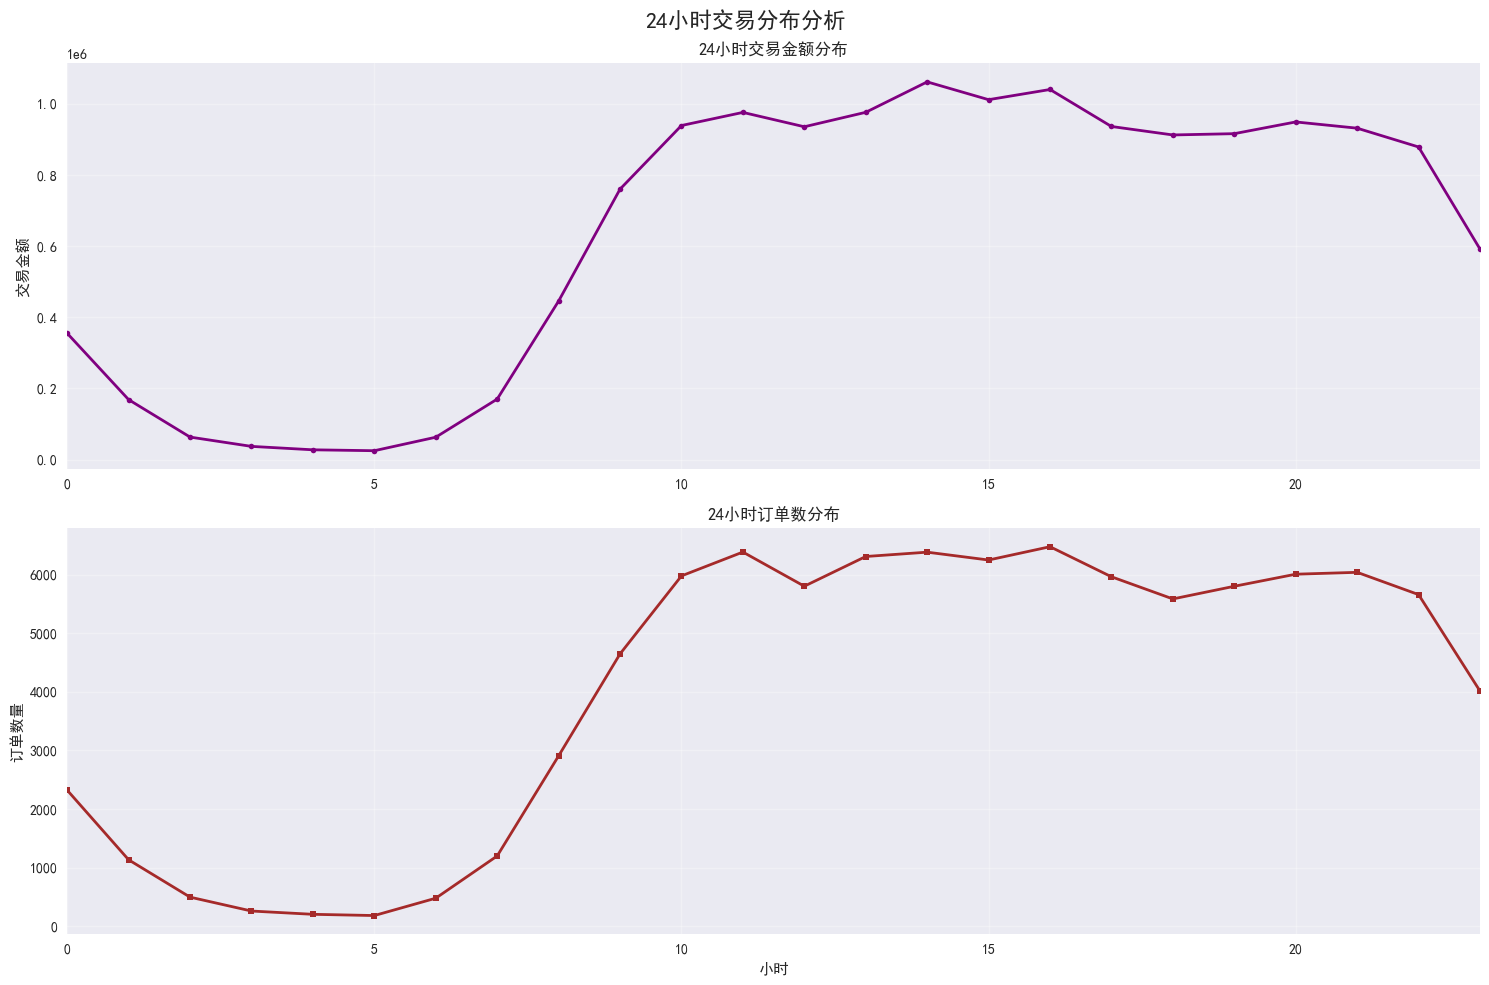


=== 4.2 地域维度分析 ===

【商家州分布TOP10】
              payment_value  order_id  seller_id
seller_state                                    
SP               9791776.63     68409       1762
PR               1405084.68      7433        333
MG               1166588.96      7653        235
RJ                903470.23      4186        163
SC                708428.51      3558        184
RS                421687.77      1943        124
BA                285672.11       548         18
DF                110073.72       803         30
PE                 99225.60       402          9
GO                 76066.94       451         39


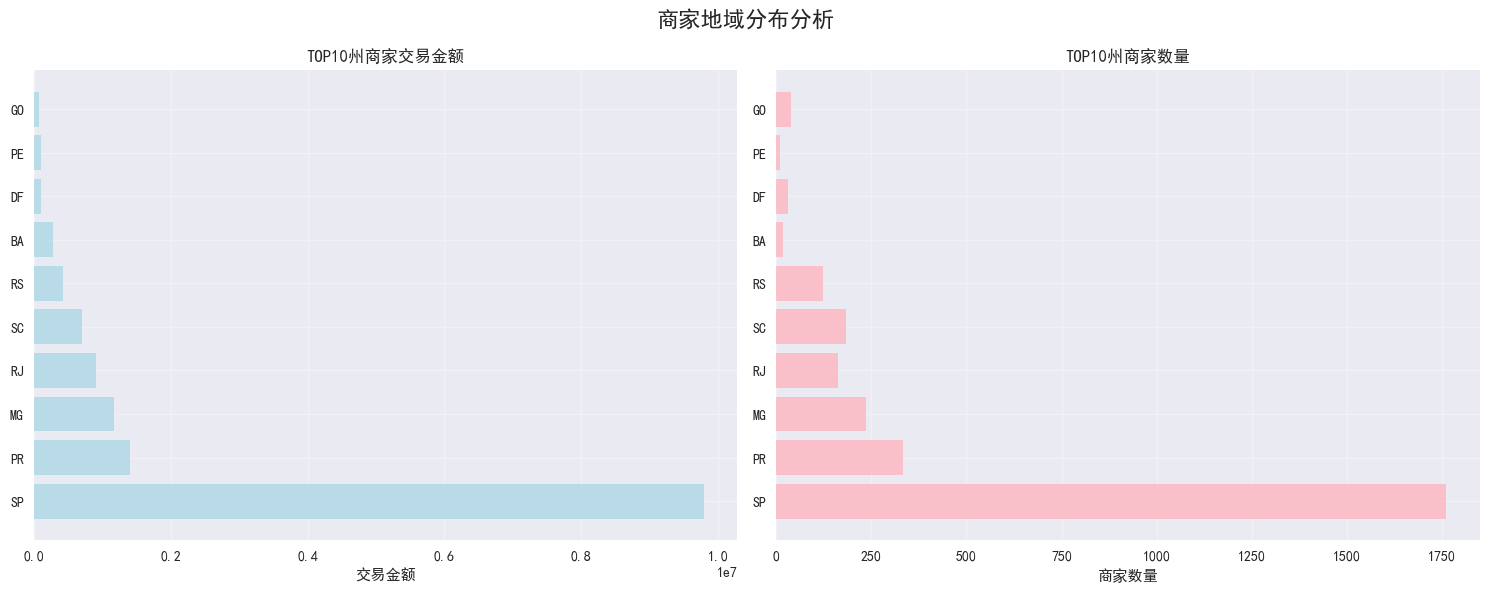


【用户州分布TOP10】
                payment_value  order_id  customer_id
customer_state                                      
SP                 5678880.92     40500        40500
RJ                 2021382.29     12348        12348
MG                 1791240.36     11354        11354
RS                  846628.91      5345         5345
PR                  772140.56      4923         4923
SC                  586669.77      3546         3546
BA                  579786.23      3256         3256
DF                  338497.70      2080         2080
GO                  329008.17      1956         1956
ES                  313315.92      1995         1995


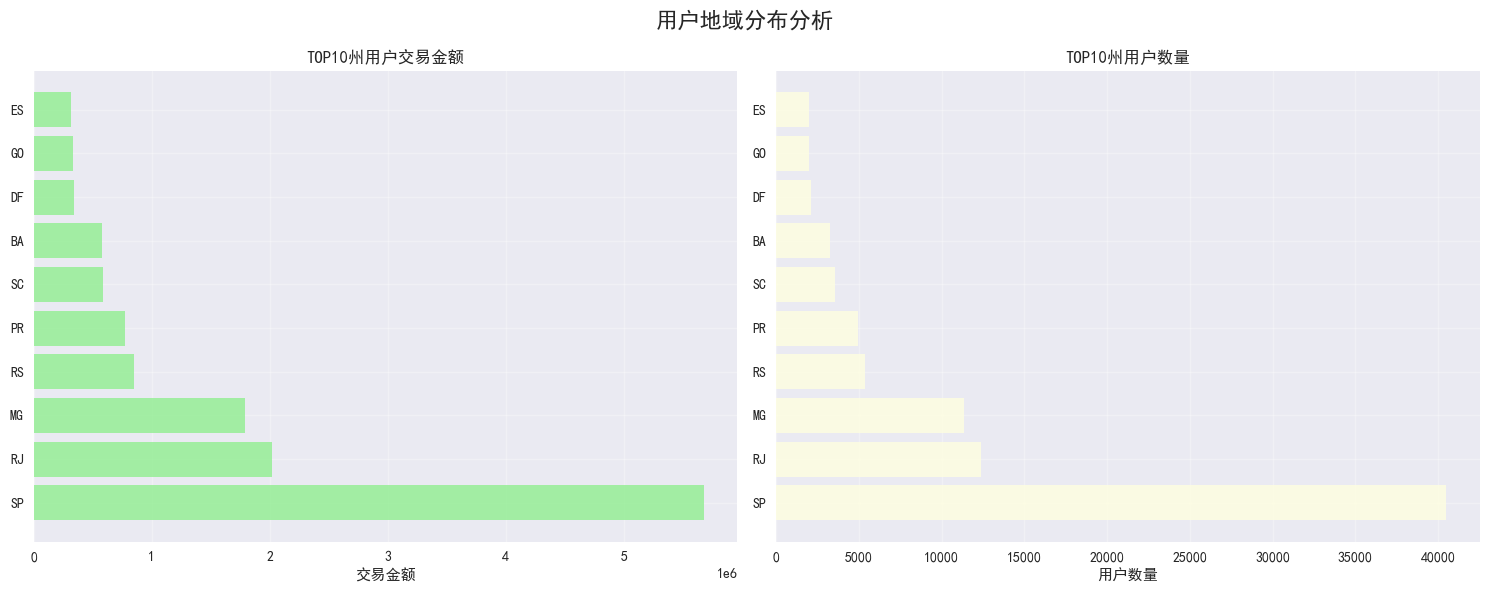


=== 4.3 产品维度分析 ===

【品类销售TOP10】
                        payment_value  order_id
product_category_name                          
beleza_saude               1394145.05      8612
relogios_presentes         1241113.66      5475
cama_mesa_banho            1203413.58      9174
esporte_lazer              1103530.49      7494
informatica_acessorios     1021478.80      6508
moveis_decoracao            869448.64      6208
utilidades_domesticas       743053.78      5689
cool_stuff                  678126.78      3517
automotivo                  656894.24      3790
ferramentas_jardim          560307.22      3415


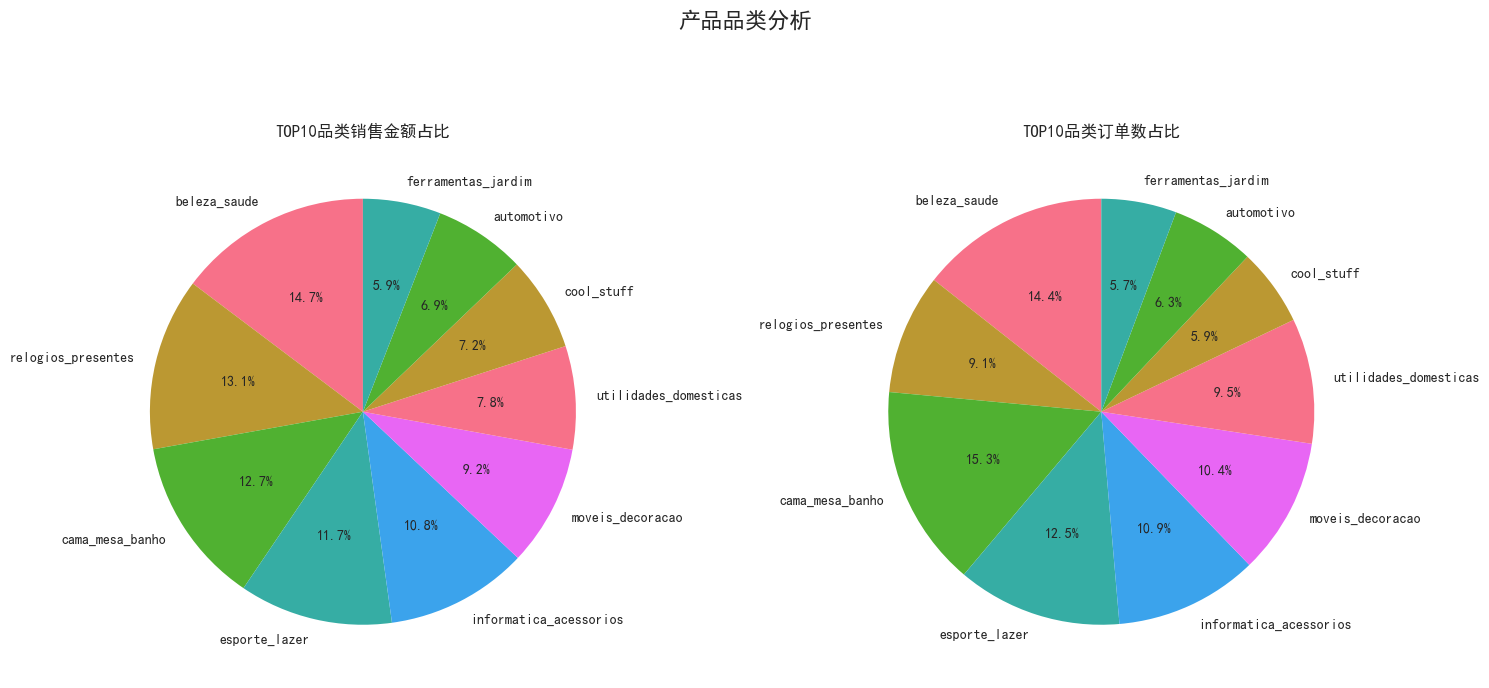


【交易金额区间分布】
             order_id
price_range          
50-100          29102
100-150         18889
0-50            17763
200-500         15166
150-200         11564
500-1000         2916
1000+            1074


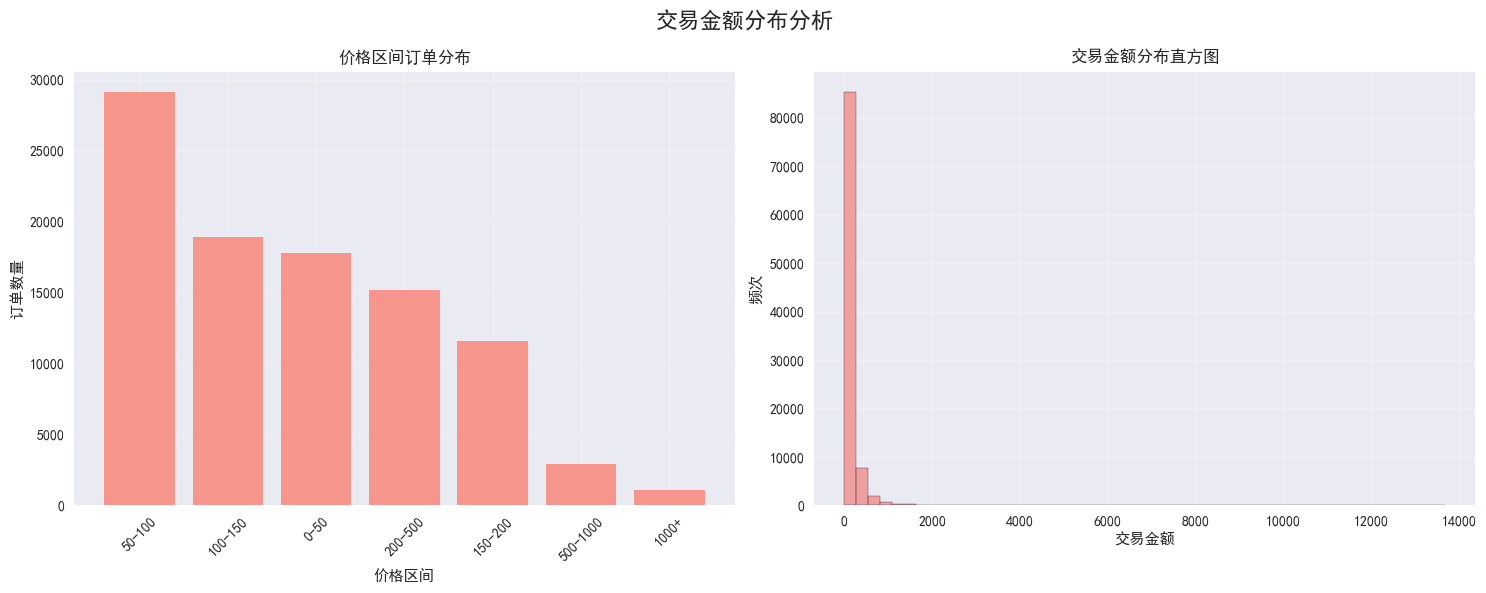


=== 4.4 支付维度分析 ===

【支付方式分布】
              payment_value  order_id
payment_type                         
credit_card     11985504.54     73126
boleto           2769932.58     19191
debit_card        208401.12      1485
voucher           206599.31      2672


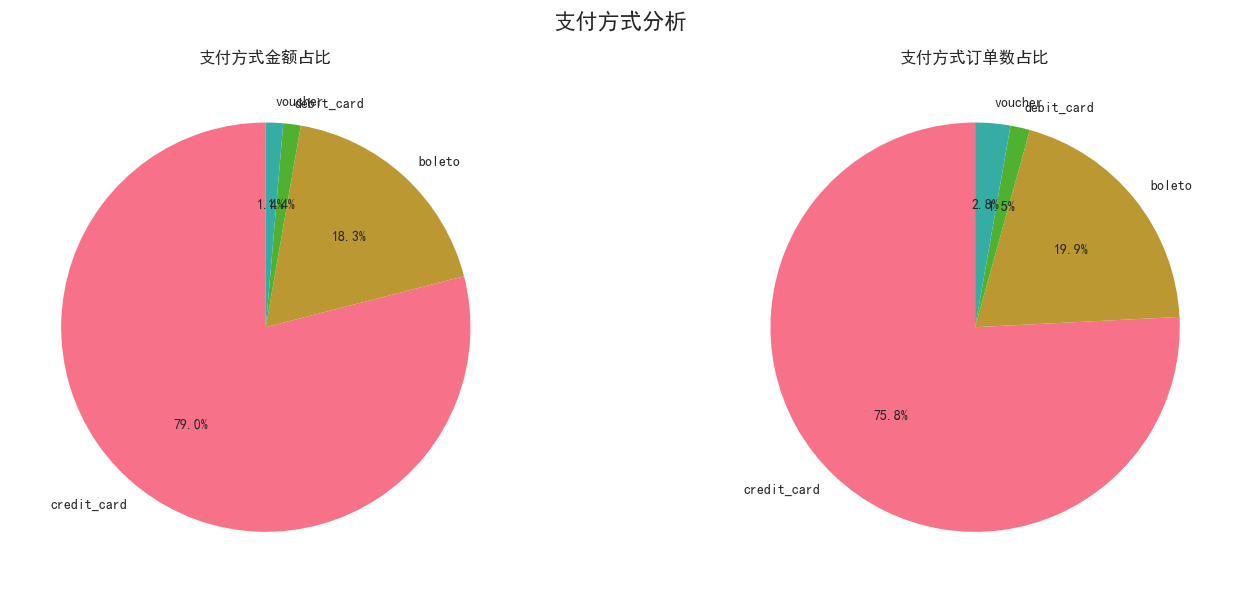


【分期付款分布】
                      payment_value  order_id
payment_installments                         
1.0                      5525554.88     47197
10.0                     2089587.45      5089
2.0                      1518118.64     11938
3.0                      1432369.87     10054
8.0                      1255210.32      4101
4.0                      1117267.24      6812
5.0                       920641.57      5036
6.0                       785071.55      3762
7.0                       287594.69      1546
9.0                       121956.99       614


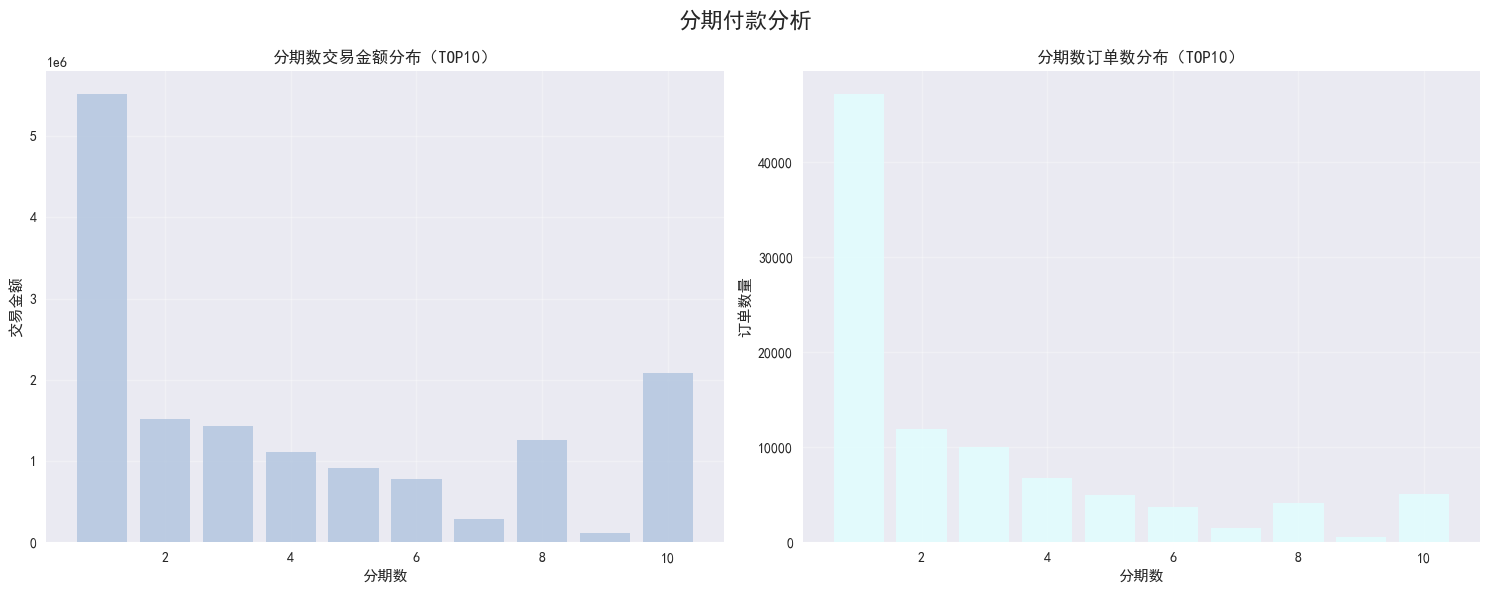


=== 4.5 用户评价分析 ===

【用户评价分布】
review_score
1     9692
2     2992
3     8005
4    18950
5    56835
Name: count, dtype: int64
好评率(4-5分): 78.55%
差评率(1-3分): 21.45%


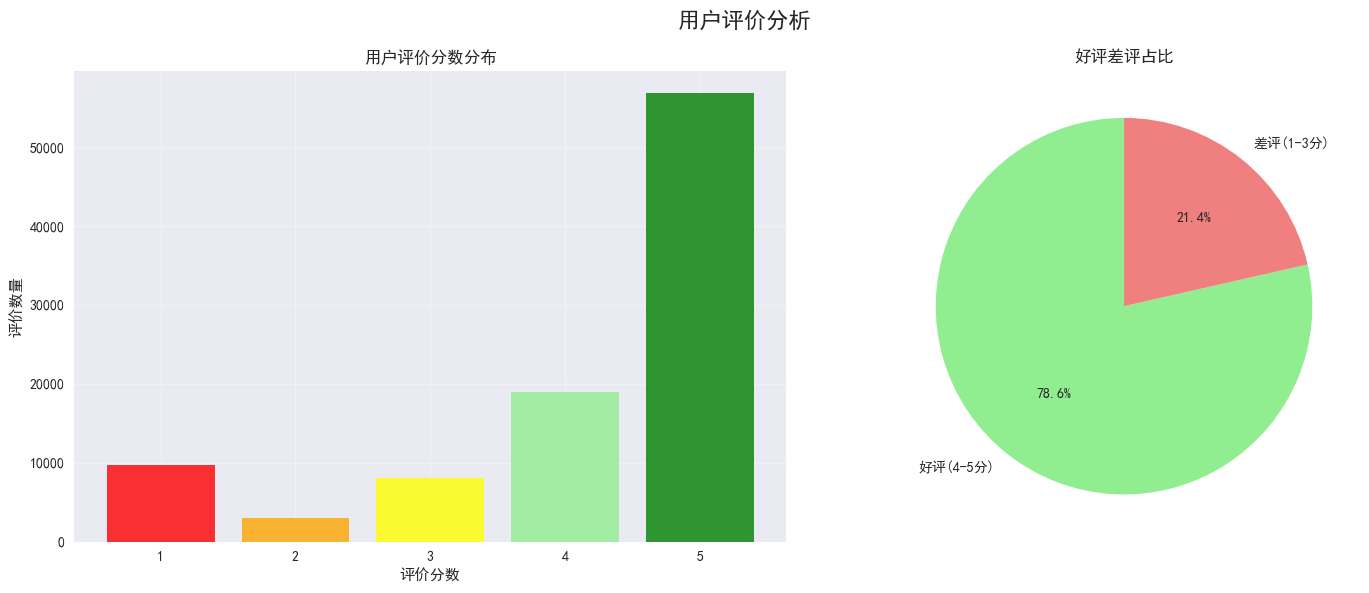


【用户评价时间分布】
review_hour
0    96394
1       80
dtype: int64


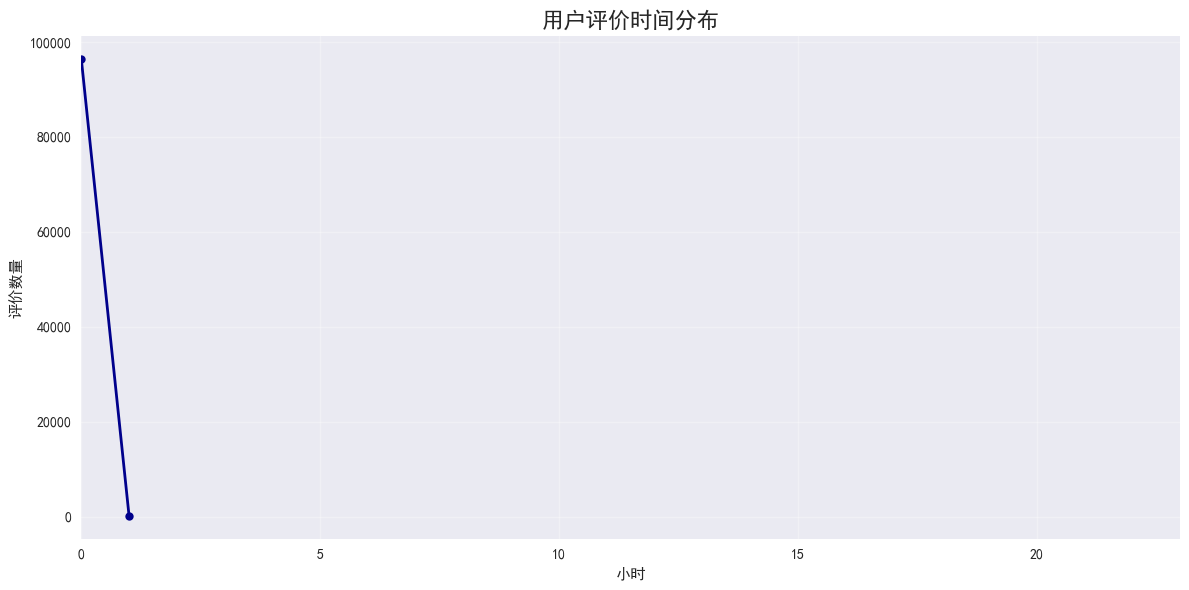


=== 综合分析总结 ===


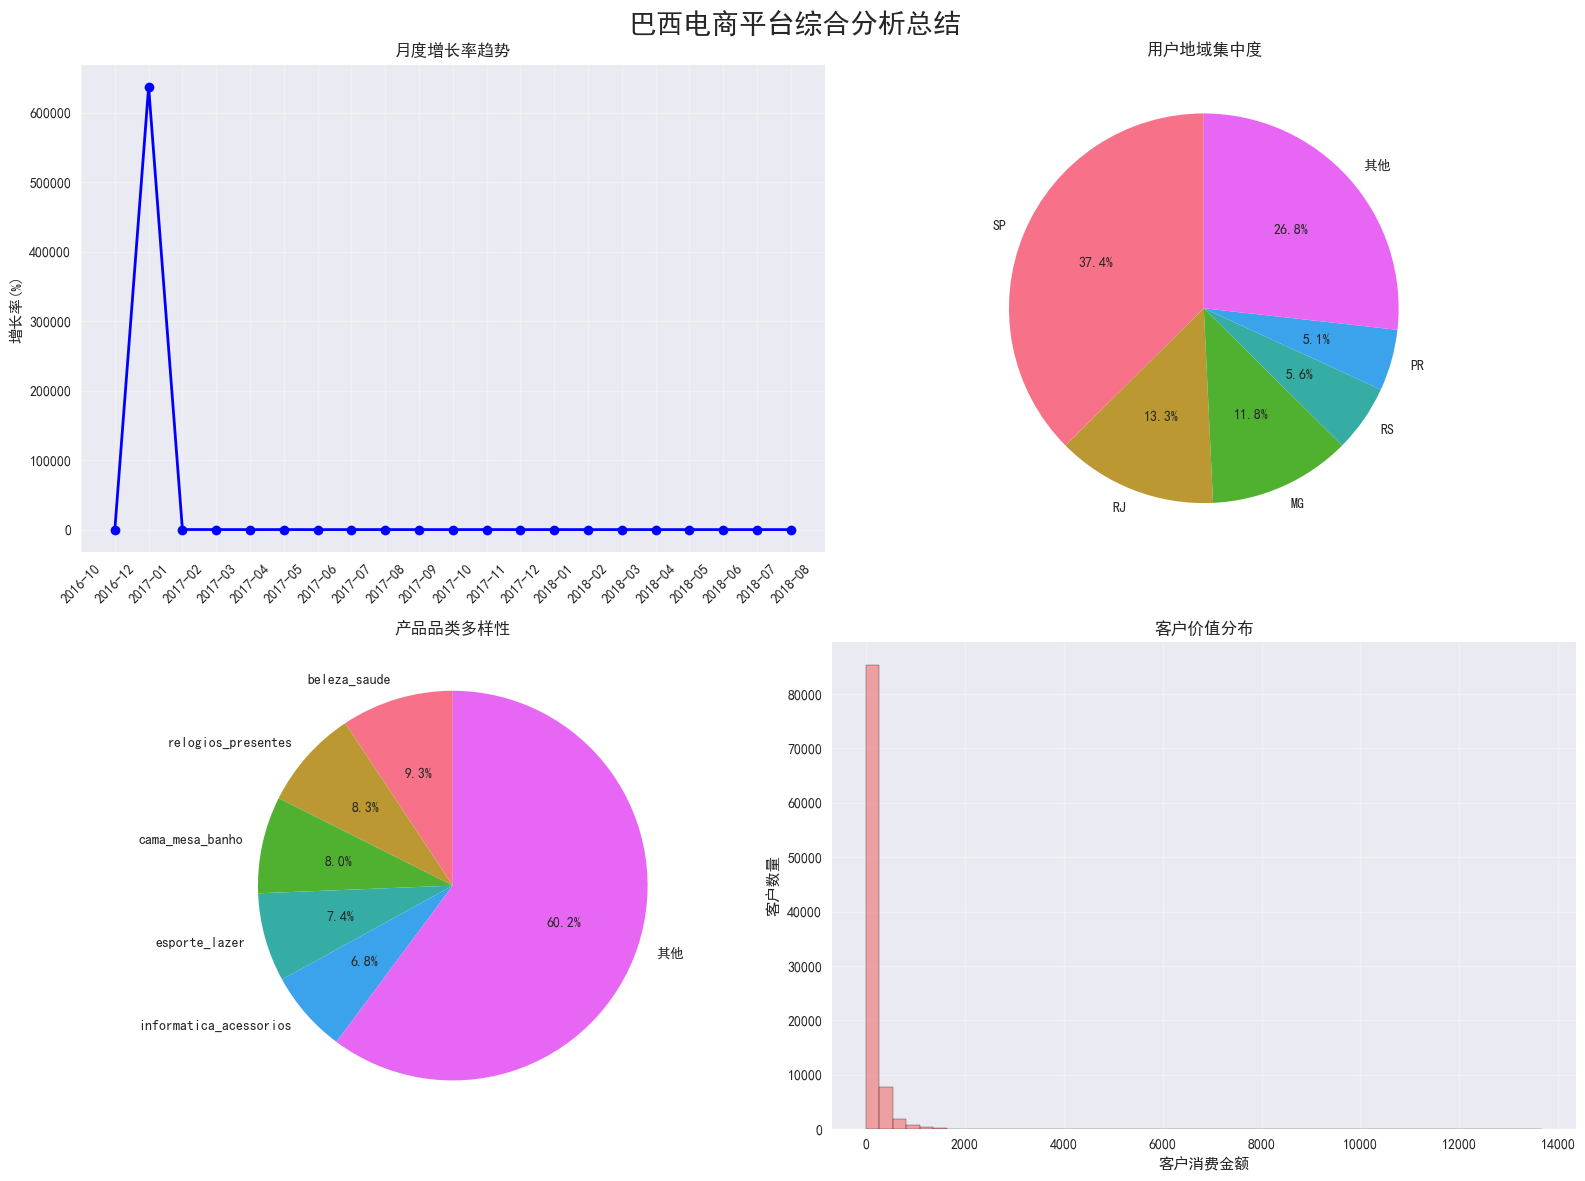


=== 核心洞察与建议 ===

【数据洞察】
1. 时间趋势：平台呈现明显的季节性特征，11月为销售高峰期
2. 地域特征：SP州占据主导地位，用户和商家高度集中
3. 产品结构：品类丰富但分散，需要培育核心品类
4. 用户行为：工作日购物较多，晚间活跃度高
5. 支付偏好：信用卡为主流支付方式，分期付款普及
6. 服务质量：整体好评率较高，用户满意度良好

【策略建议】
1. 营销策略：利用11月黑五等节点进行大促活动
2. 区域拓展：深耕SP州市场，探索其他潜力地区
3. 品类管理：重点发展热门品类，优化长尾商品
4. 用户体验：优化移动端购物体验，提升转化率
5. 金融服务：加强分期付款服务，提升客单价
6. 客户服务：建立完善的售后服务体系

=== 分析完成！ ===
所有关键指标已完成可视化分析，建议结合具体业务场景制定详细的执行计划。


In [ ]:
# 巴西电商平台数据分析报告 - 增强版（含可视化）
# ====================================

# 1. 导入必要的库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
import matplotlib



matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['font.family'] = 'sans-serif'
plt.rcParams['axes.unicode_minus'] = False  


# 2. 数据加载与预处理
print("=== 数据加载与预处理 ===")
df = pd.read_csv('Orders_merged.csv', parse_dates=['order_purchase_timestamp', 'order_approved_at', 
                                                  'order_delivered_carrier_date', 'order_delivered_customer_date', 
                                                  'order_estimated_delivery_date', 'review_creation_date', 
                                                  'review_answer_timestamp'])

print(f"原始数据集形状: {df.shape}")

# 数据清洗
df = df.dropna(subset=['order_id', 'customer_id', 'order_purchase_timestamp', 'payment_value'])
df = df[df['order_status'].isin(['delivered', 'shipped'])]
df = df[df['payment_value'] > 0]

print(f"清洗后数据集形状: {df.shape}")

# 3. 数据概览
print("\n=== 数据概览 ===")
gmv = df['payment_value'].sum()
order_count = df['order_id'].nunique()
customer_count = df['customer_id'].nunique()
seller_count = df['seller_id'].nunique()
aov = gmv / order_count
acs = gmv / customer_count

print(f"GMV(总交易额): {gmv:,.2f} 元")
print(f"订单总数: {order_count:,} 笔")
print(f"客户总数: {customer_count:,} 人")
print(f"商家总数: {seller_count:,} 家")
print(f"平均订单价值(AOV): {aov:.2f} 元")
print(f"客户平均消费(ACS): {acs:.2f} 元")

# 创建关键指标仪表板
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('巴西电商平台核心指标仪表板', fontsize=20, fontweight='bold', fontproperties=font)

# GMV展示
ax1 = axes[0, 0]
ax1.text(0.5, 0.5, f'GMV\n{gmv:,.0f}', ha='center', va='center', 
         fontsize=18, fontweight='bold', transform=ax1.transAxes)
ax1.set_title('总交易额', fontsize=14, fontweight='bold',fontproperties=font)
ax1.axis('off')

# 订单数展示
ax2 = axes[0, 1]
ax2.text(0.5, 0.5, f'订单数\n{order_count:,}', ha='center', va='center', 
         fontsize=18, fontweight='bold', transform=ax2.transAxes)
ax2.set_title('订单总数', fontsize=14, fontweight='bold')
ax2.axis('off')

# 客户数展示
ax3 = axes[0, 2]
ax3.text(0.5, 0.5, f'客户数\n{customer_count:,}', ha='center', va='center', 
         fontsize=18, fontweight='bold', transform=ax3.transAxes)
ax3.set_title('客户总数', fontsize=14, fontweight='bold')
ax3.axis('off')

# 商家数展示
ax4 = axes[1, 0]
ax4.text(0.5, 0.5, f'商家数\n{seller_count:,}', ha='center', va='center', 
         fontsize=18, fontweight='bold', transform=ax4.transAxes)
ax4.set_title('商家总数', fontsize=14, fontweight='bold')
ax4.axis('off')

# AOV展示
ax5 = axes[1, 1]
ax5.text(0.5, 0.5, f'AOV\n{aov:.2f}', ha='center', va='center', 
         fontsize=18, fontweight='bold', transform=ax5.transAxes)
ax5.set_title('平均订单价值', fontsize=14, fontweight='bold')
ax5.axis('off')

# ACS展示
ax6 = axes[1, 2]
ax6.text(0.5, 0.5, f'ACS\n{acs:.2f}', ha='center', va='center', 
         fontsize=18, fontweight='bold', transform=ax6.transAxes)
ax6.set_title('客户平均消费', fontsize=14, fontweight='bold')
ax6.axis('off')

plt.tight_layout()
plt.show()

# 4. 时间维度分析及可视化
print("\n=== 4.1 时间维度分析 ===")

# 4.1 年度交易情况
df['order_year'] = df['order_purchase_timestamp'].dt.year
yearly_analysis = df.groupby('order_year').agg({
    'payment_value': 'sum',
    'order_id': 'nunique'
}).round(2)

print("\n【年度交易情况】")
print(yearly_analysis)

# 年度交易趋势图
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('年度交易趋势分析', fontsize=16, fontweight='bold')

# 年度GMV趋势
ax1.bar(yearly_analysis.index, yearly_analysis['payment_value'], color='skyblue', alpha=0.8)
ax1.set_title('年度交易金额', fontweight='bold')
ax1.set_xlabel('年份')
ax1.set_ylabel('交易金额')
ax1.grid(True, alpha=0.3)

# 年度订单数趋势
ax2.bar(yearly_analysis.index, yearly_analysis['order_id'], color='lightcoral', alpha=0.8)
ax2.set_title('年度订单数量', fontweight='bold')
ax2.set_xlabel('年份')
ax2.set_ylabel('订单数量')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 4.2 月度交易情况
df['order_month'] = df['order_purchase_timestamp'].dt.to_period('M')
monthly_analysis = df.groupby('order_month').agg({
    'payment_value': 'sum',
    'order_id': 'nunique'
}).round(2)

print("\n【月度交易情况】")
print(monthly_analysis)

# 月度交易趋势图
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))
fig.suptitle('月度交易趋势分析', fontsize=16, fontweight='bold')

# 月度GMV趋势
ax1.plot(monthly_analysis.index.astype(str), monthly_analysis['payment_value'], 
         marker='o', linewidth=2, markersize=6, color='blue')
ax1.set_title('月度交易金额趋势', fontweight='bold')
ax1.set_ylabel('交易金额')
ax1.grid(True, alpha=0.3)
ax1.tick_params(axis='x', rotation=45)

# 月度订单数趋势
ax2.plot(monthly_analysis.index.astype(str), monthly_analysis['order_id'], 
         marker='s', linewidth=2, markersize=6, color='red')
ax2.set_title('月度订单数量趋势', fontweight='bold')
ax2.set_xlabel('月份')
ax2.set_ylabel('订单数量')
ax2.grid(True, alpha=0.3)
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# 4.3 工作日交易情况
df['weekday'] = df['order_purchase_timestamp'].dt.day_name()
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_analysis = df.groupby('weekday').agg({
    'payment_value': 'sum',
    'order_id': 'nunique'
}).reindex(weekday_order)

print("\n【工作日交易情况】")
print(weekday_analysis)

# 工作日交易分布图
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('工作日交易分布分析', fontsize=16, fontweight='bold')

# 工作日GMV分布
ax1.bar(range(len(weekday_analysis)), weekday_analysis['payment_value'], 
        color='lightgreen', alpha=0.8)
ax1.set_title('工作日交易金额分布', fontweight='bold')
ax1.set_xlabel('星期')
ax1.set_ylabel('交易金额')
ax1.set_xticks(range(len(weekday_analysis)))
ax1.set_xticklabels(['周一', '周二', '周三', '周四', '周五', '周六', '周日'])
ax1.grid(True, alpha=0.3)

# 工作日订单数分布
ax2.bar(range(len(weekday_analysis)), weekday_analysis['order_id'], 
        color='orange', alpha=0.8)
ax2.set_title('工作日订单数分布', fontweight='bold')
ax2.set_xlabel('星期')
ax2.set_ylabel('订单数量')
ax2.set_xticks(range(len(weekday_analysis)))
ax2.set_xticklabels(['周一', '周二', '周三', '周四', '周五', '周六', '周日'])
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 4.4 时段交易情况
df['order_hour'] = df['order_purchase_timestamp'].dt.hour
hourly_analysis = df.groupby('order_hour').agg({
    'payment_value': 'sum',
    'order_id': 'nunique'
}).round(2)

print("\n【时段交易情况】")
print(hourly_analysis)

# 时段交易分布图
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))
fig.suptitle('24小时交易分布分析', fontsize=16, fontweight='bold')

# 时段GMV分布
ax1.plot(hourly_analysis.index, hourly_analysis['payment_value'], 
         marker='o', linewidth=2, markersize=4, color='purple')
ax1.set_title('24小时交易金额分布', fontweight='bold')
ax1.set_ylabel('交易金额')
ax1.grid(True, alpha=0.3)
ax1.set_xlim(0, 23)

# 时段订单数分布
ax2.plot(hourly_analysis.index, hourly_analysis['order_id'], 
         marker='s', linewidth=2, markersize=4, color='brown')
ax2.set_title('24小时订单数分布', fontweight='bold')
ax2.set_xlabel('小时')
ax2.set_ylabel('订单数量')
ax2.grid(True, alpha=0.3)
ax2.set_xlim(0, 23)

plt.tight_layout()
plt.show()

# 5. 地域维度分析及可视化
print("\n=== 4.2 地域维度分析 ===")

# 5.1 商家地域分布
seller_state_analysis = df.groupby('seller_state').agg({
    'payment_value': 'sum',
    'order_id': 'nunique',
    'seller_id': 'nunique'
}).sort_values('payment_value', ascending=False)

print("\n【商家州分布TOP10】")
print(seller_state_analysis.head(10))

# 商家地域分布图
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('商家地域分布分析', fontsize=16, fontweight='bold')

# TOP10州商家交易金额
top10_seller_states = seller_state_analysis.head(10)
ax1.barh(range(len(top10_seller_states)), top10_seller_states['payment_value'], 
         color='lightblue', alpha=0.8)
ax1.set_title('TOP10州商家交易金额', fontweight='bold')
ax1.set_xlabel('交易金额')
ax1.set_yticks(range(len(top10_seller_states)))
ax1.set_yticklabels(top10_seller_states.index)
ax1.grid(True, alpha=0.3)

# TOP10州商家数量
ax2.barh(range(len(top10_seller_states)), top10_seller_states['seller_id'], 
         color='lightpink', alpha=0.8)
ax2.set_title('TOP10州商家数量', fontweight='bold')
ax2.set_xlabel('商家数量')
ax2.set_yticks(range(len(top10_seller_states)))
ax2.set_yticklabels(top10_seller_states.index)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 5.2 用户地域分布
customer_state_analysis = df.groupby('customer_state').agg({
    'payment_value': 'sum',
    'order_id': 'nunique',
    'customer_id': 'nunique'
}).sort_values('payment_value', ascending=False)

print("\n【用户州分布TOP10】")
print(customer_state_analysis.head(10))

# 用户地域分布图
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('用户地域分布分析', fontsize=16, fontweight='bold')

# TOP10州用户交易金额
top10_customer_states = customer_state_analysis.head(10)
ax1.barh(range(len(top10_customer_states)), top10_customer_states['payment_value'], 
         color='lightgreen', alpha=0.8)
ax1.set_title('TOP10州用户交易金额', fontweight='bold')
ax1.set_xlabel('交易金额')
ax1.set_yticks(range(len(top10_customer_states)))
ax1.set_yticklabels(top10_customer_states.index)
ax1.grid(True, alpha=0.3)

# TOP10州用户数量
ax2.barh(range(len(top10_customer_states)), top10_customer_states['customer_id'], 
         color='lightyellow', alpha=0.8)
ax2.set_title('TOP10州用户数量', fontweight='bold')
ax2.set_xlabel('用户数量')
ax2.set_yticks(range(len(top10_customer_states)))
ax2.set_yticklabels(top10_customer_states.index)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 6. 产品维度分析及可视化
print("\n=== 4.3 产品维度分析 ===")

# 6.1 品类分析
category_analysis = df.groupby('product_category_name').agg({
    'payment_value': 'sum',
    'order_id': 'nunique'
}).sort_values('payment_value', ascending=False)

print("\n【品类销售TOP10】")
print(category_analysis.head(10))

# 品类分布图
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))
fig.suptitle('产品品类分析', fontsize=16, fontweight='bold')

# TOP10品类销售金额
top10_categories = category_analysis.head(10)
ax1.pie(top10_categories['payment_value'], labels=top10_categories.index, 
        autopct='%1.1f%%', startangle=90)
ax1.set_title('TOP10品类销售金额占比', fontweight='bold')

# TOP10品类订单数
ax2.pie(top10_categories['order_id'], labels=top10_categories.index, 
        autopct='%1.1f%%', startangle=90)
ax2.set_title('TOP10品类订单数占比', fontweight='bold')

plt.tight_layout()
plt.show()

# 6.2 价格分布分析
df['price_range'] = pd.cut(df['payment_value'], 
                          bins=[0, 50, 100, 150, 200, 500, 1000, float('inf')],
                          labels=['0-50', '50-100', '100-150', '150-200', '200-500', '500-1000', '1000+'])

price_range_analysis = df.groupby('price_range').agg({
    'order_id': 'nunique'
}).sort_values('order_id', ascending=False)

print("\n【交易金额区间分布】")
print(price_range_analysis)

# 价格分布图
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('交易金额分布分析', fontsize=16, fontweight='bold')

# 价格区间分布
ax1.bar(price_range_analysis.index, price_range_analysis['order_id'], 
        color='salmon', alpha=0.8)
ax1.set_title('价格区间订单分布', fontweight='bold')
ax1.set_xlabel('价格区间')
ax1.set_ylabel('订单数量')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True, alpha=0.3)

# 价格分布直方图
ax2.hist(df['payment_value'], bins=50, color='lightcoral', alpha=0.7, edgecolor='black')
ax2.set_title('交易金额分布直方图', fontweight='bold')
ax2.set_xlabel('交易金额')
ax2.set_ylabel('频次')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 7. 支付维度分析及可视化
print("\n=== 4.4 支付维度分析 ===")

# 7.1 支付方式分析
payment_type_analysis = df.groupby('payment_type').agg({
    'payment_value': 'sum',
    'order_id': 'nunique'
}).sort_values('payment_value', ascending=False)

print("\n【支付方式分布】")
print(payment_type_analysis)

# 支付方式分布图
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('支付方式分析', fontsize=16, fontweight='bold')

# 支付方式金额占比
ax1.pie(payment_type_analysis['payment_value'], labels=payment_type_analysis.index, 
        autopct='%1.1f%%', startangle=90)
ax1.set_title('支付方式金额占比', fontweight='bold')

# 支付方式订单数占比
ax2.pie(payment_type_analysis['order_id'], labels=payment_type_analysis.index, 
        autopct='%1.1f%%', startangle=90)
ax2.set_title('支付方式订单数占比', fontweight='bold')

plt.tight_layout()
plt.show()

# 7.2 分期付款分析
installment_analysis = df.groupby('payment_installments').agg({
    'payment_value': 'sum',
    'order_id': 'nunique'
}).sort_values('payment_value', ascending=False)

print("\n【分期付款分布】")
print(installment_analysis.head(10))

# 分期付款分布图
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('分期付款分析', fontsize=16, fontweight='bold')

# 分期数分布（前10期）
top10_installments = installment_analysis.head(10)
ax1.bar(top10_installments.index, top10_installments['payment_value'], 
        color='lightsteelblue', alpha=0.8)
ax1.set_title('分期数交易金额分布（TOP10）', fontweight='bold')
ax1.set_xlabel('分期数')
ax1.set_ylabel('交易金额')
ax1.grid(True, alpha=0.3)

# 分期数订单分布
ax2.bar(top10_installments.index, top10_installments['order_id'], 
        color='lightcyan', alpha=0.8)
ax2.set_title('分期数订单数分布（TOP10）', fontweight='bold')
ax2.set_xlabel('分期数')
ax2.set_ylabel('订单数量')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 8. 用户评价分析及可视化
print("\n=== 4.5 用户评价分析 ===")

# 8.1 用户评价分布
review_analysis = df['review_score'].value_counts().sort_index()
print("\n【用户评价分布】")
print(review_analysis)

total_reviews = review_analysis.sum()
good_reviews = review_analysis[review_analysis.index >= 4].sum()
bad_reviews = review_analysis[review_analysis.index <= 3].sum()
good_rate = good_reviews / total_reviews * 100
bad_rate = bad_reviews / total_reviews * 100

print(f"好评率(4-5分): {good_rate:.2f}%")
print(f"差评率(1-3分): {bad_rate:.2f}%")

# 用户评价分布图
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('用户评价分析', fontsize=16, fontweight='bold')

# 评价分数分布
ax1.bar(review_analysis.index, review_analysis.values, 
        color=['red', 'orange', 'yellow', 'lightgreen', 'green'], alpha=0.8)
ax1.set_title('用户评价分数分布', fontweight='bold')
ax1.set_xlabel('评价分数')
ax1.set_ylabel('评价数量')
ax1.grid(True, alpha=0.3)

# 好评差评占比
labels = ['好评(4-5分)', '差评(1-3分)']
sizes = [good_rate, bad_rate]
colors = ['lightgreen', 'lightcoral']
ax2.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
ax2.set_title('好评差评占比', fontweight='bold')

plt.tight_layout()
plt.show()

# 8.2 评价时间分析
df_reviews = df.dropna(subset=['review_creation_date'])
df_reviews['review_hour'] = df_reviews['review_creation_date'].dt.hour
review_hour_analysis = df_reviews.groupby('review_hour').size()

print("\n【用户评价时间分布】")
print(review_hour_analysis)

# 评价时间分布图
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(review_hour_analysis.index, review_hour_analysis.values, 
        marker='o', linewidth=2, markersize=6, color='darkblue')
ax.set_title('用户评价时间分布', fontsize=16, fontweight='bold')
ax.set_xlabel('小时')
ax.set_ylabel('评价数量')
ax.grid(True, alpha=0.3)
ax.set_xlim(0, 23)

plt.tight_layout()
plt.show()

# 9. 综合分析总结
print("\n=== 综合分析总结 ===")

# 创建综合分析图表
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('巴西电商平台综合分析总结', fontsize=20, fontweight='bold')

# 月度增长趋势
monthly_growth = monthly_analysis['payment_value'].pct_change() * 100
ax1.plot(monthly_growth.index.astype(str), monthly_growth.values, 
         marker='o', linewidth=2, color='blue')
ax1.set_title('月度增长率趋势', fontweight='bold')
ax1.set_ylabel('增长率(%)')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True, alpha=0.3)

# 地域集中度分析
top5_states = customer_state_analysis.head(5)
others = customer_state_analysis.iloc[5:]['payment_value'].sum()
concentration_data = list(top5_states['payment_value']) + [others]
concentration_labels = list(top5_states.index) + ['其他']

ax2.pie(concentration_data, labels=concentration_labels, autopct='%1.1f%%', startangle=90)
ax2.set_title('用户地域集中度', fontweight='bold')

# 品类多样性分析
top5_categories = category_analysis.head(5)
others_cat = category_analysis.iloc[5:]['payment_value'].sum()
diversity_data = list(top5_categories['payment_value']) + [others_cat]
diversity_labels = list(top5_categories.index) + ['其他']

ax3.pie(diversity_data, labels=diversity_labels, autopct='%1.1f%%', startangle=90)
ax3.set_title('产品品类多样性', fontweight='bold')

# 客户价值分布
customer_value = df.groupby('customer_id')['payment_value'].sum()
ax4.hist(customer_value, bins=50, color='lightcoral', alpha=0.7, edgecolor='black')
ax4.set_title('客户价值分布', fontweight='bold')
ax4.set_xlabel('客户消费金额')
ax4.set_ylabel('客户数量')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 10. 核心洞察与建议
print("\n=== 核心洞察与建议 ===")

print("\n【数据洞察】")
print("1. 时间趋势：平台呈现明显的季节性特征，11月为销售高峰期")
print("2. 地域特征：SP州占据主导地位，用户和商家高度集中")
print("3. 产品结构：品类丰富但分散，需要培育核心品类")
print("4. 用户行为：工作日购物较多，晚间活跃度高")
print("5. 支付偏好：信用卡为主流支付方式，分期付款普及")
print("6. 服务质量：整体好评率较高，用户满意度良好")

print("\n【策略建议】")
print("1. 营销策略：利用11月黑五等节点进行大促活动")
print("2. 区域拓展：深耕SP州市场，探索其他潜力地区")
print("3. 品类管理：重点发展热门品类，优化长尾商品")
print("4. 用户体验：优化移动端购物体验，提升转化率")
print("5. 金融服务：加强分期付款服务，提升客单价")
print("6. 客户服务：建立完善的售后服务体系")

print("\n=== 分析完成！ ===")
print("所有关键指标已完成可视化分析，建议结合具体业务场景制定详细的执行计划。")

In [ ]:
# ====================================

# 1. 导入必要的库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

plt.rcParams["font.sans-serif"] = ["SimHei"] # 设置字体为黑体
plt.rcParams["axes.unicode_minus"] = False # 正常显示负号

import matplotlib.font_manager as fm
for font in fm.findSystemFonts():
    if 'simhei' in font.lower() or 'msyh' in font.lower():
        print(font)


font = FontProperties(fname="C:/Windows/Fonts/simhei.ttf", size=14)

C:\Windows\Fonts\msyhl.ttc
C:\Windows\Fonts\msyhbd.ttc
C:\Windows\Fonts\simhei.ttf
C:\Windows\Fonts\msyh.ttc
